In [1]:
import os
import sys

sys.path.append('/work')

In [2]:
from omics_analyzer import OmicsAnalyzer

In [3]:
%matplotlib inline

In [4]:
analyzer = OmicsAnalyzer(excel='plasma.xlsx', result_sheet='results', feature_sheet='features', sample_sheet='samples')

In [5]:
analyzer.impute_missing_values()

In [6]:
sample_groups = analyzer.samples.iloc[:, 0].unique()
sample_groups

array(['Diagnosis:Cirrhosis', 'Diagnosis:NASH', 'Diagnosis:Normal',
       'Diagnosis:Steatosis'], dtype=object)

In [7]:
fig_hca = analyzer.show_hca_heatmap(sample_groups)

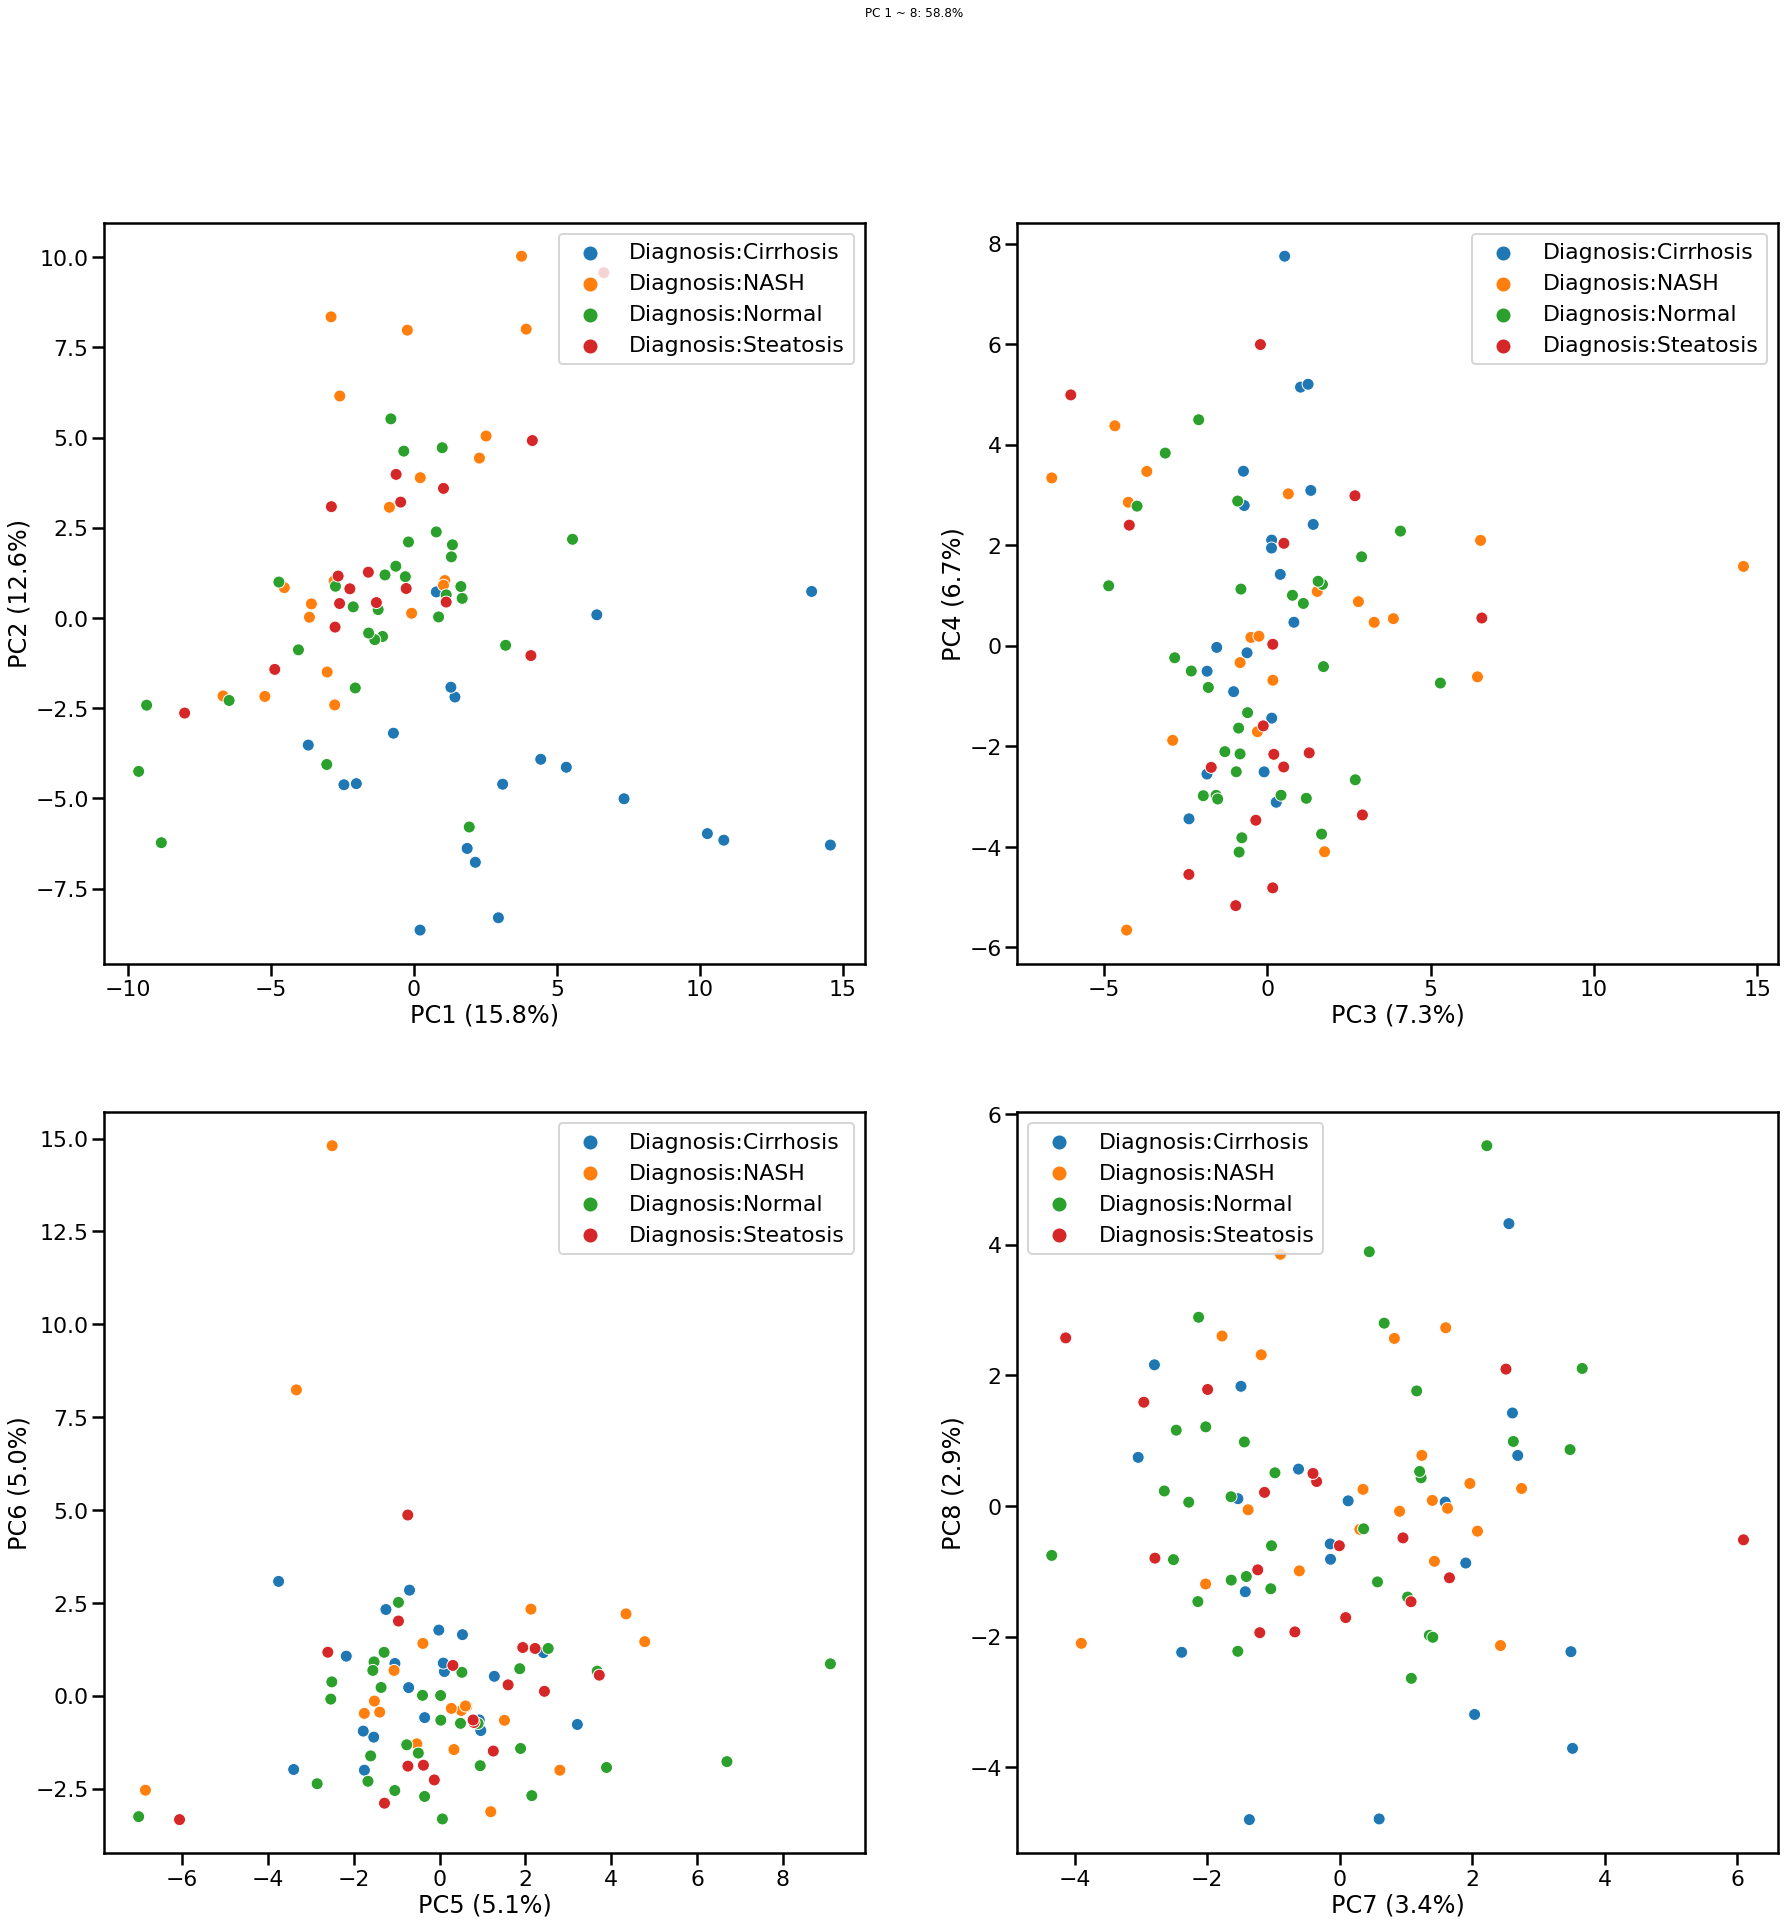

In [8]:
fig_pca = analyzer.show_pca_score_plots(sample_groups)

In [9]:
df_dems_pca = analyzer.extract_features_correlated_with_pca_scores(sample_groups)
df_dems_pca

ME231488    0.841049
ME231489    0.803916
ME231481    0.787849
ME231483    0.775637
ME231512    0.746027
ME231513    0.735392
ME231502    0.730226
ME231491    0.706086
Name: PC1, dtype: float64

In [10]:
dems_pca = df_dems_pca.index
dems_pca

Index(['ME231488', 'ME231489', 'ME231481', 'ME231483', 'ME231512', 'ME231513',
       'ME231502', 'ME231491'],
      dtype='object')

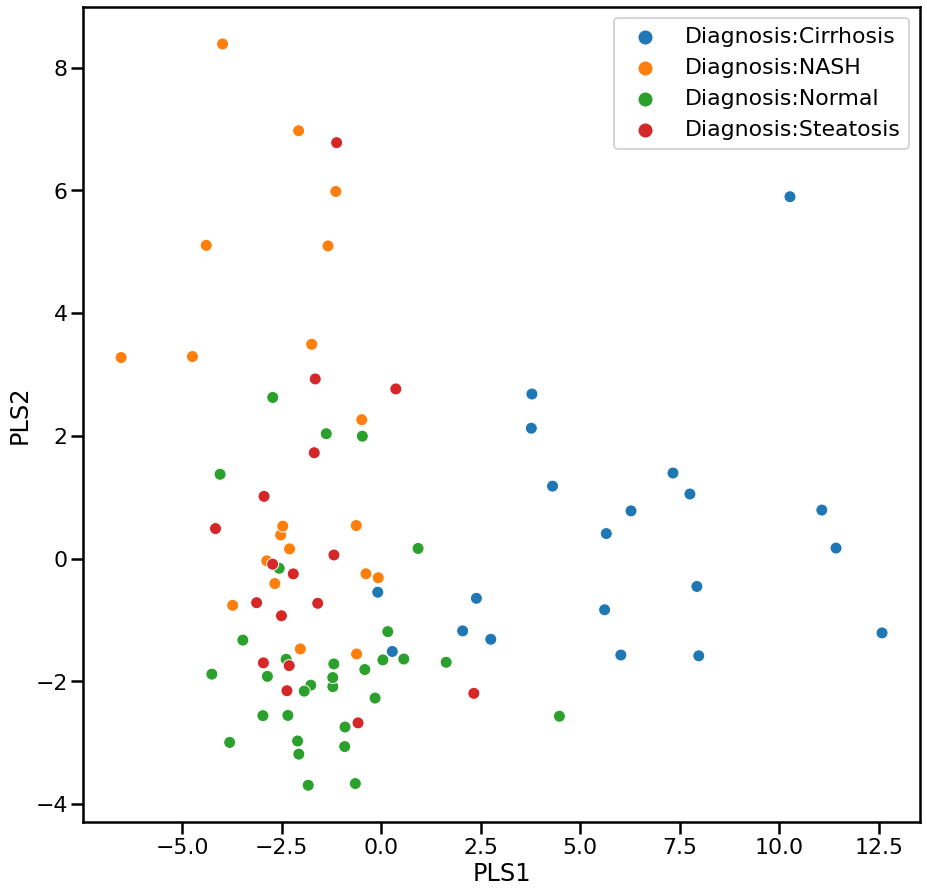

In [11]:
fig_pls_all = analyzer.show_pls_score_plots(sample_groups, cols_numerical_y=['stage'], cols_categorical_y=['factors'])

In [12]:
extracted_groups = ['Diagnosis:Normal', 'Diagnosis:NASH']

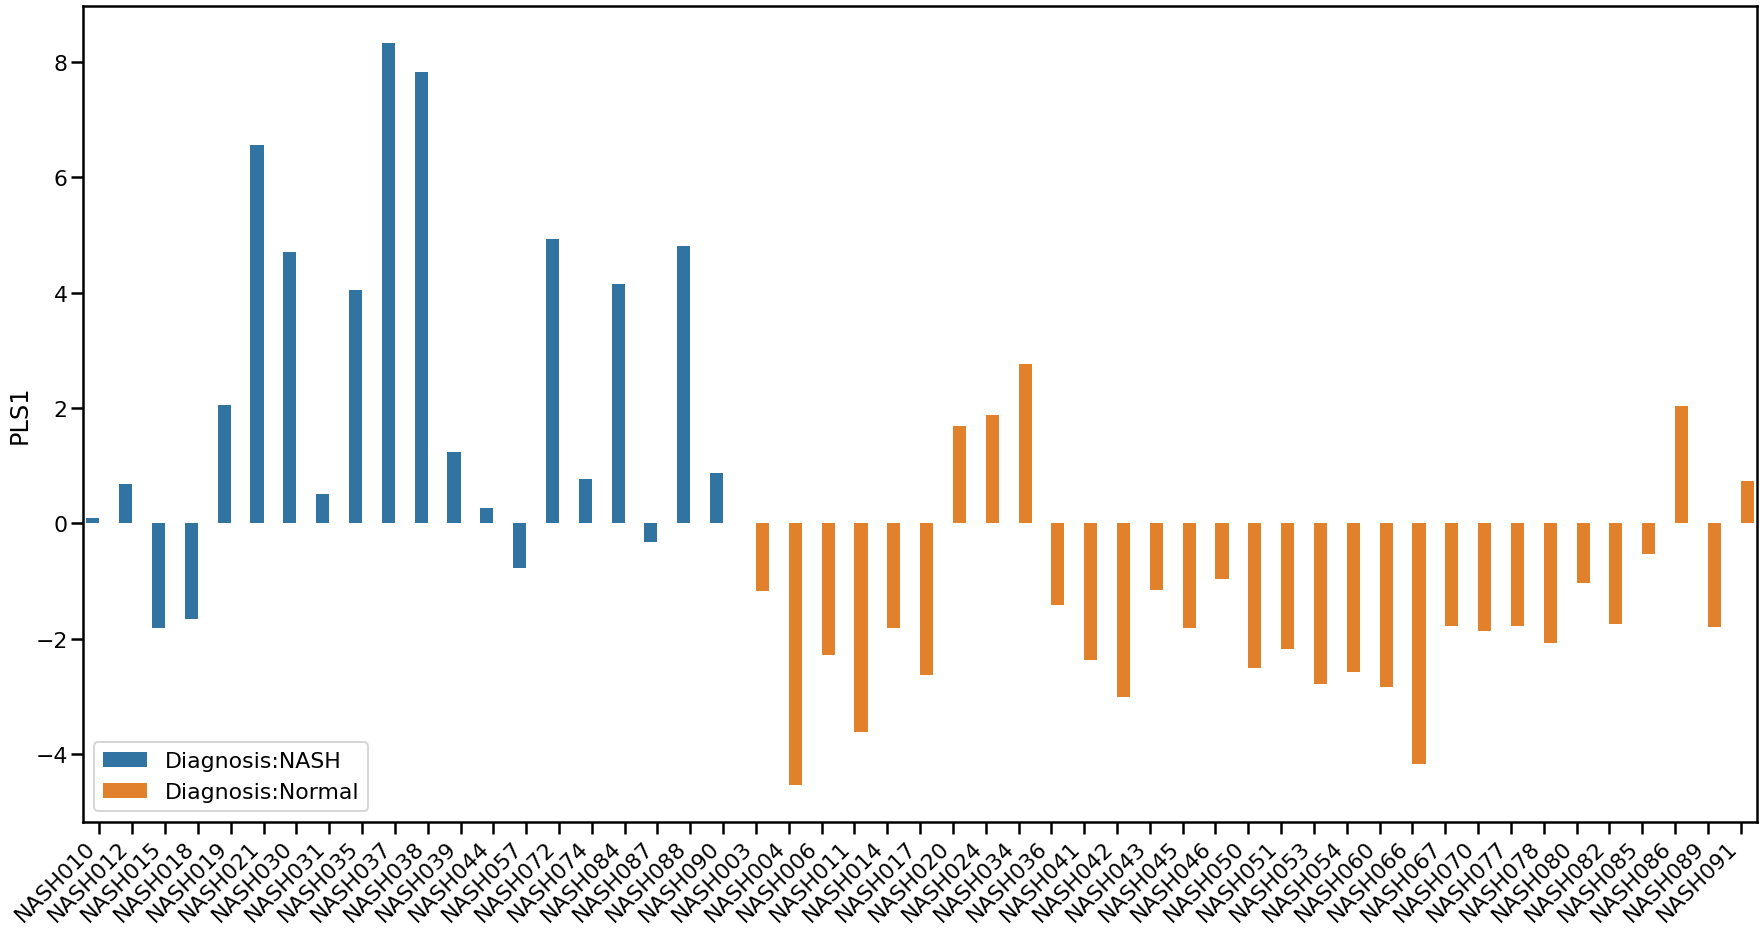

In [13]:
fig_pls_extracted = analyzer.show_pls_score_plots(extracted_groups, cols_numerical_y=['stage'], cols_categorical_y=['factors'])

In [14]:
df_dems_pls1 = analyzer.extract_features_correlated_with_pls_scores(
    extracted_groups, cols_numerical_y=['stage'], cols_categorical_y=['factors'], pc=1
)
df_dems_pls1.head()

ME231470    0.705157
Name: PLS1, dtype: float64

In [15]:
dems_pls1 = df_dems_pls1.index
dems_pls1

Index(['ME231470'], dtype='object')

In [16]:
df_dems_pls2 = analyzer.extract_features_correlated_with_pls_scores(
    extracted_groups, cols_numerical_y=['stage'], cols_categorical_y=['factors'], pc=2
)
df_dems_pls2.head()

ME231492    0.816532
ME231489    0.747369
ME231506    0.734904
ME231513    0.724400
ME231488    0.722720
Name: PLS2, dtype: float64

In [17]:
dems_pls2 = df_dems_pls2.index
dems_pls2

Index(['ME231492', 'ME231489', 'ME231506', 'ME231513', 'ME231488', 'ME231515',
       'ME231504'],
      dtype='object')

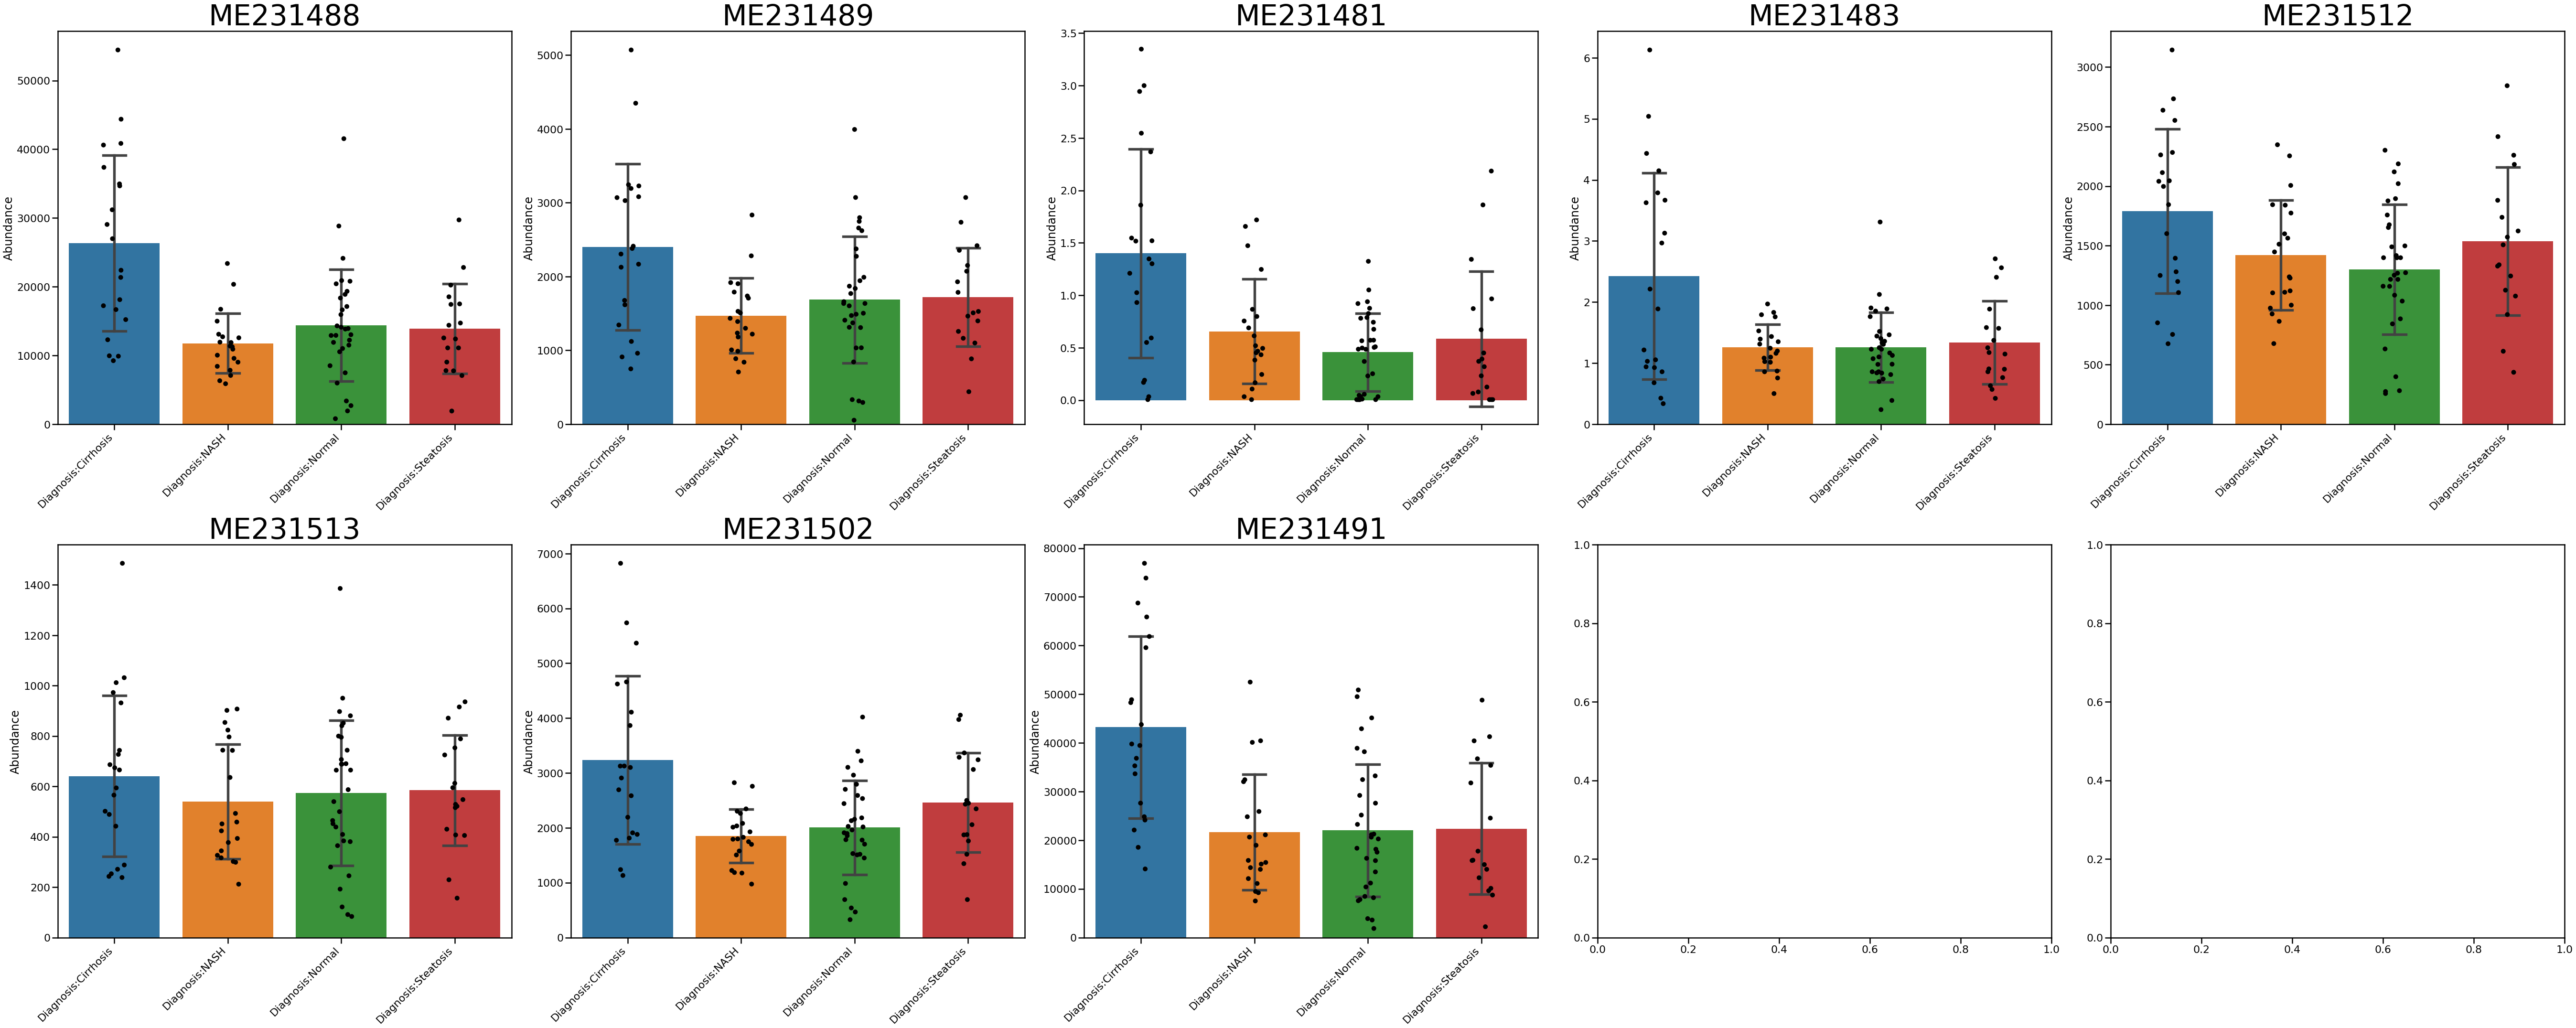

In [18]:
fig_barplot_pca = analyzer.show_barplots(features=dems_pca, groups=sample_groups)

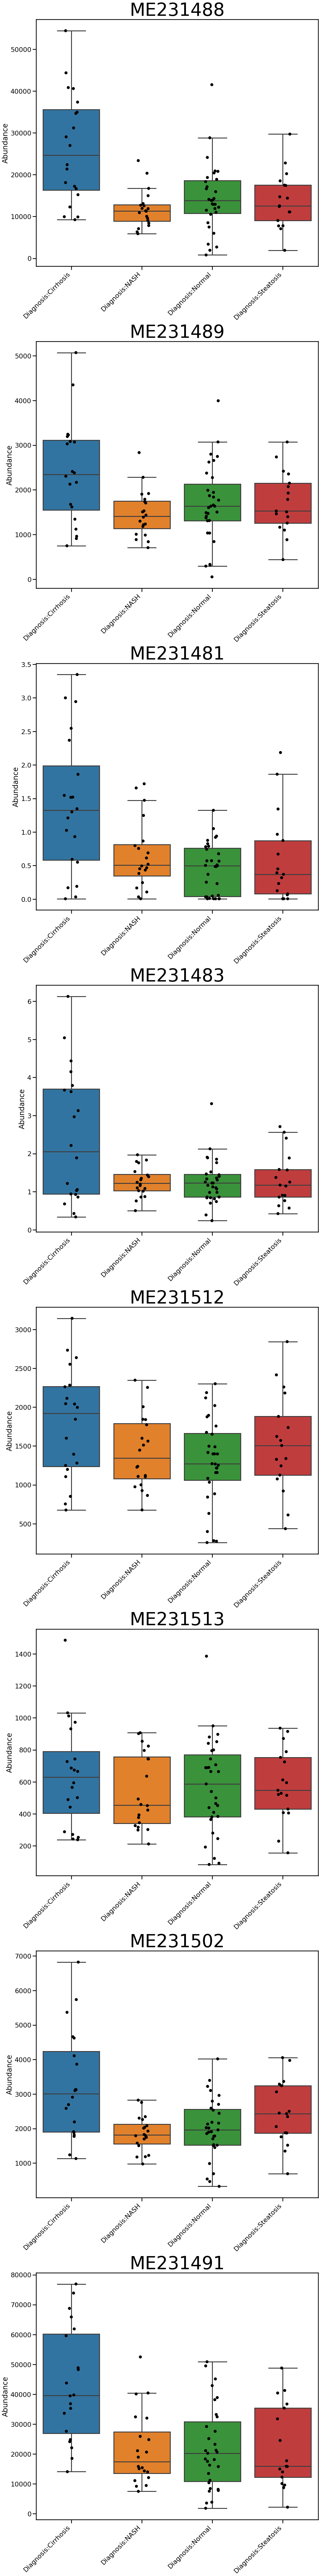

In [19]:
fig_boxplot_pca = analyzer.show_boxplots(features=dems_pca, groups=sample_groups)

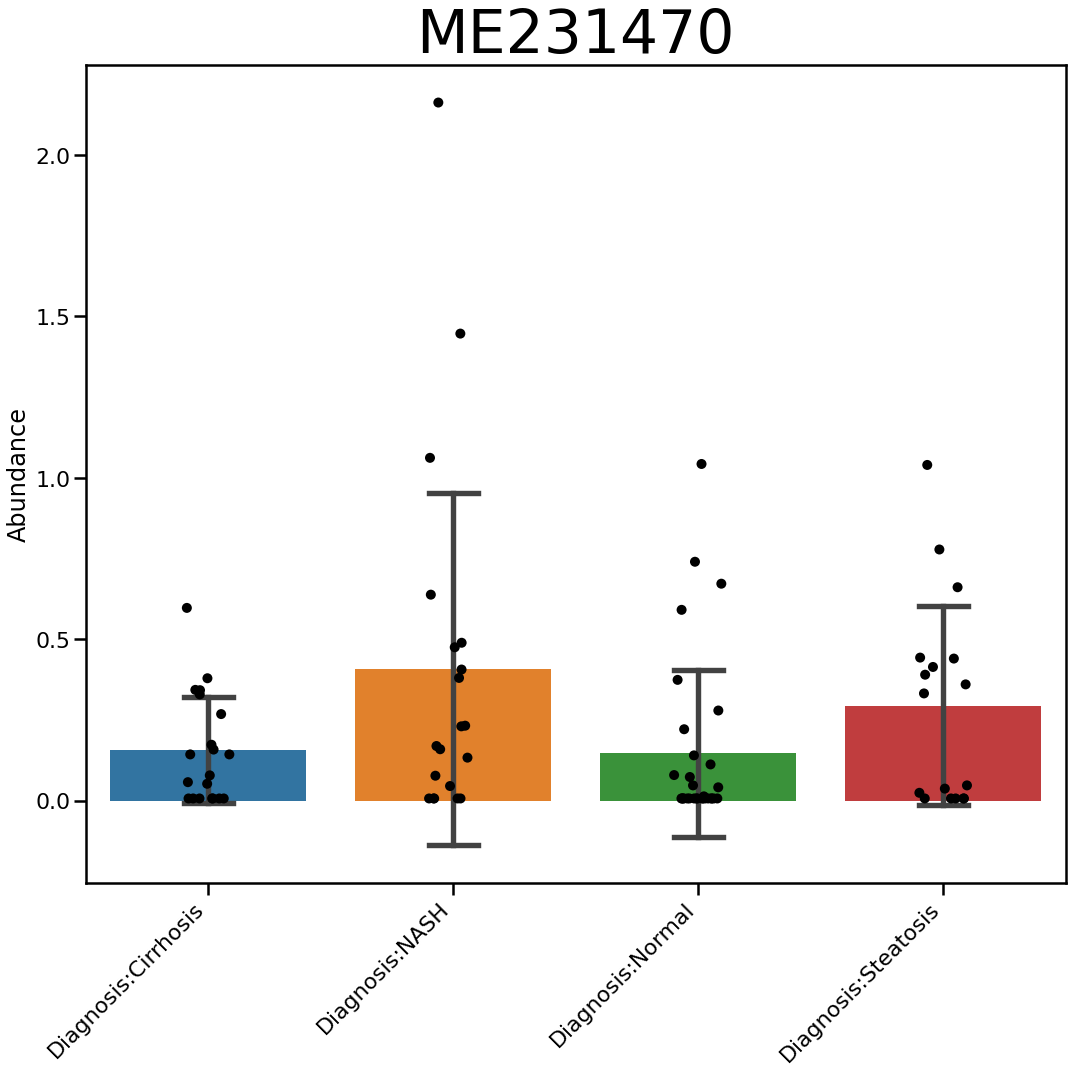

In [20]:
fig_barplot_pls1 = analyzer.show_barplots(features=dems_pls1, groups=sample_groups)

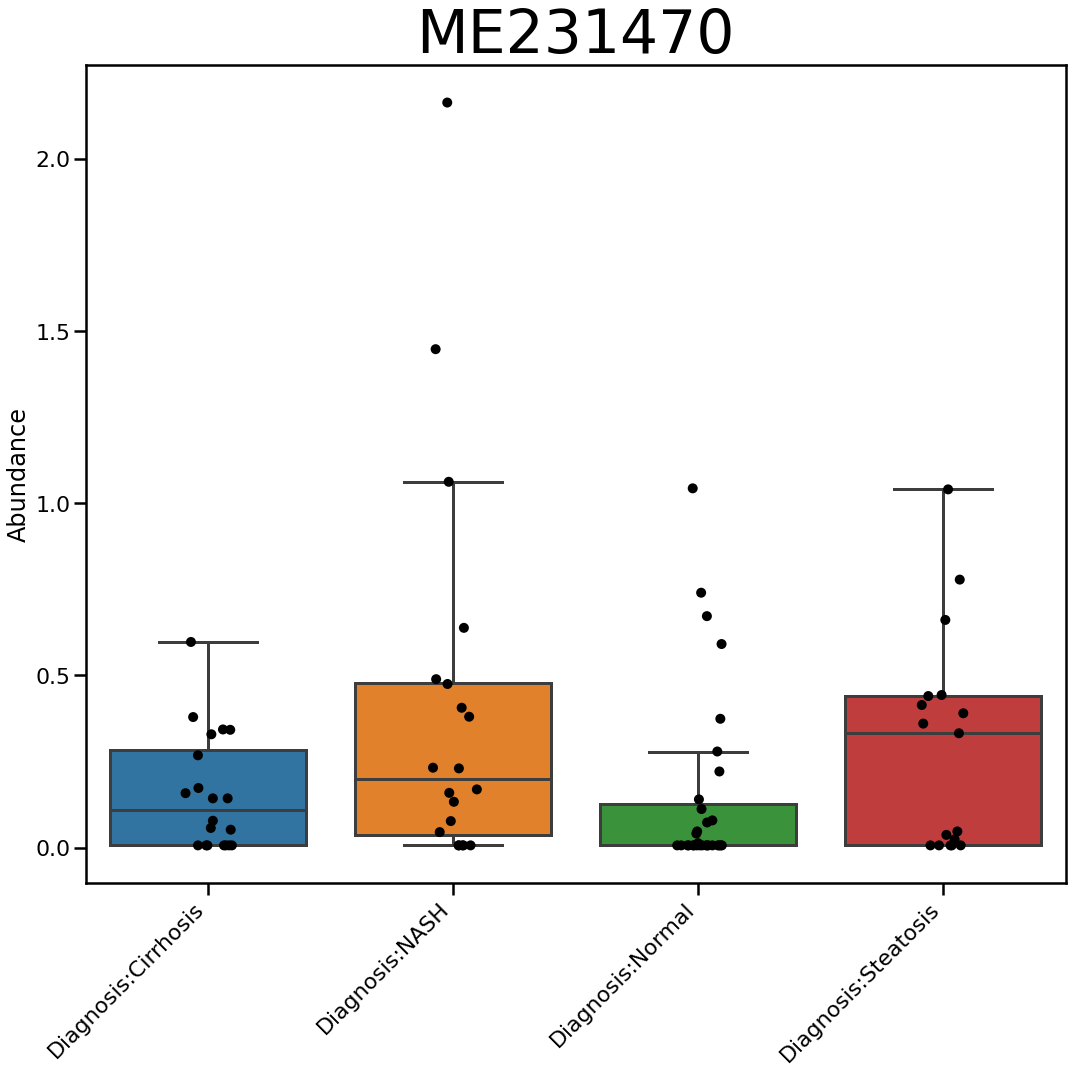

In [21]:
fig_boxplot_pls1 = analyzer.show_boxplots(features=dems_pls1, groups=sample_groups)

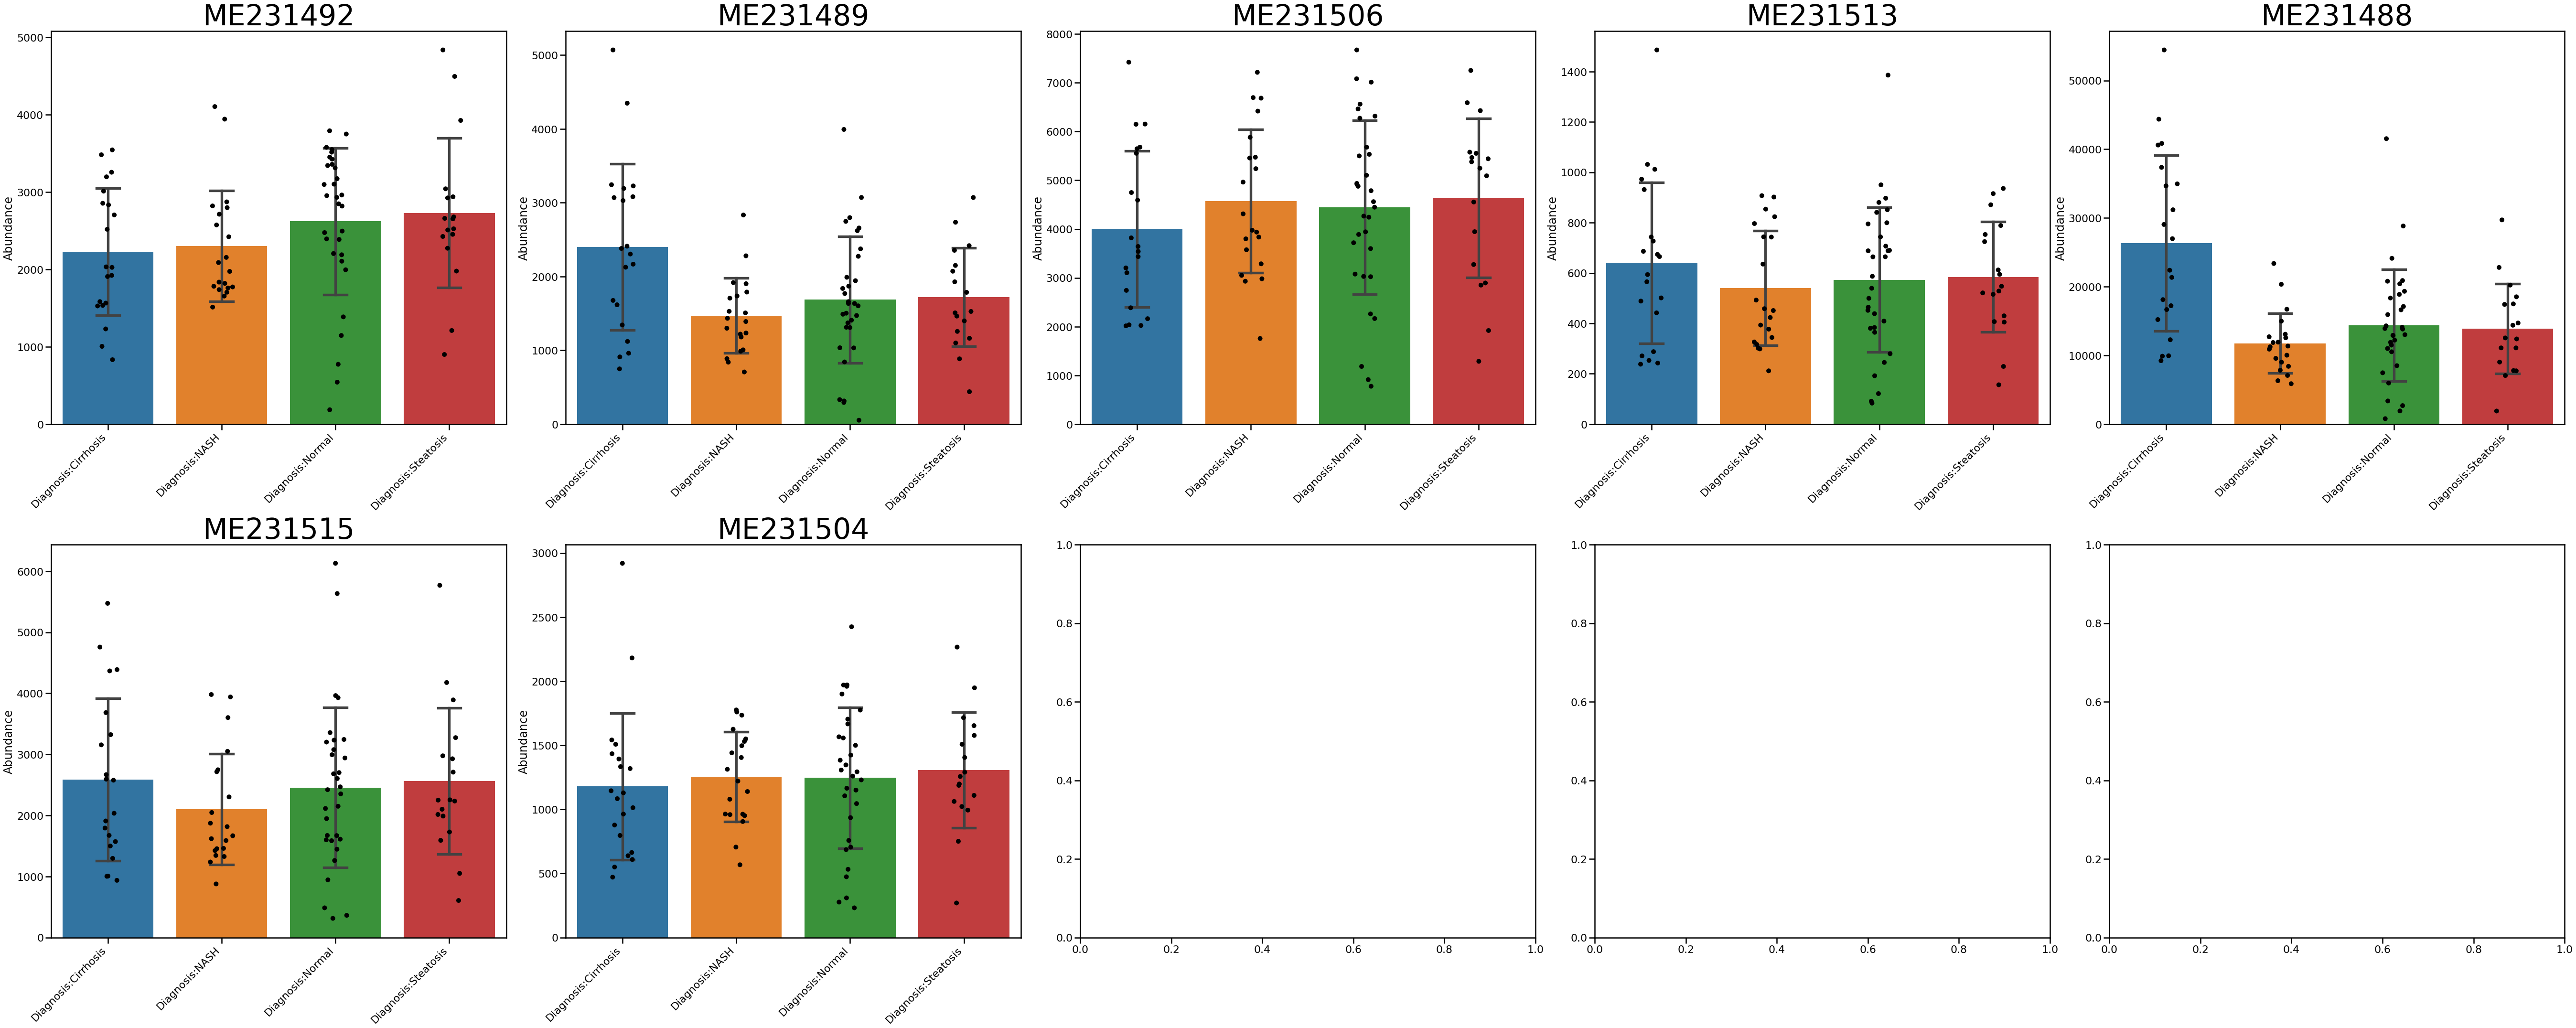

In [22]:
fig_barplot_pls2 = analyzer.show_barplots(features=dems_pls2, groups=sample_groups)

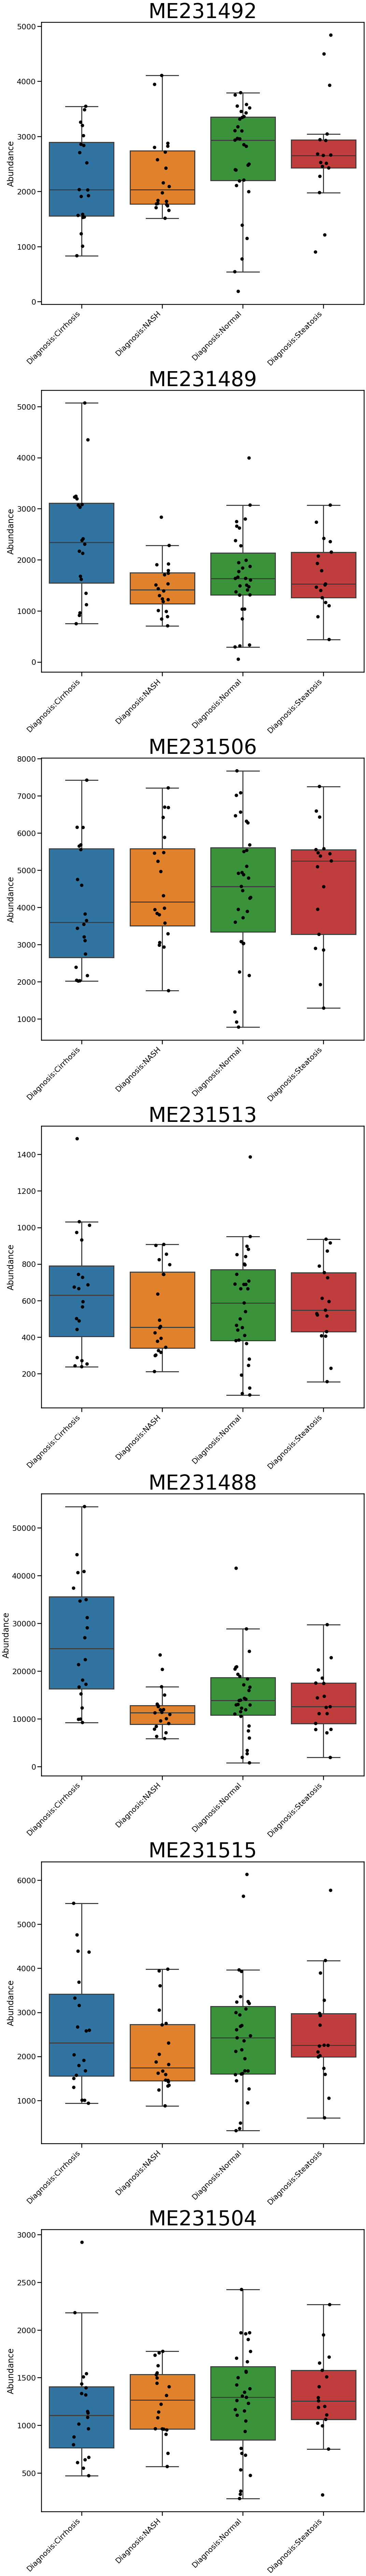

In [23]:
fig_boxplot_pls2 = analyzer.show_boxplots(features=dems_pls2, groups=sample_groups)

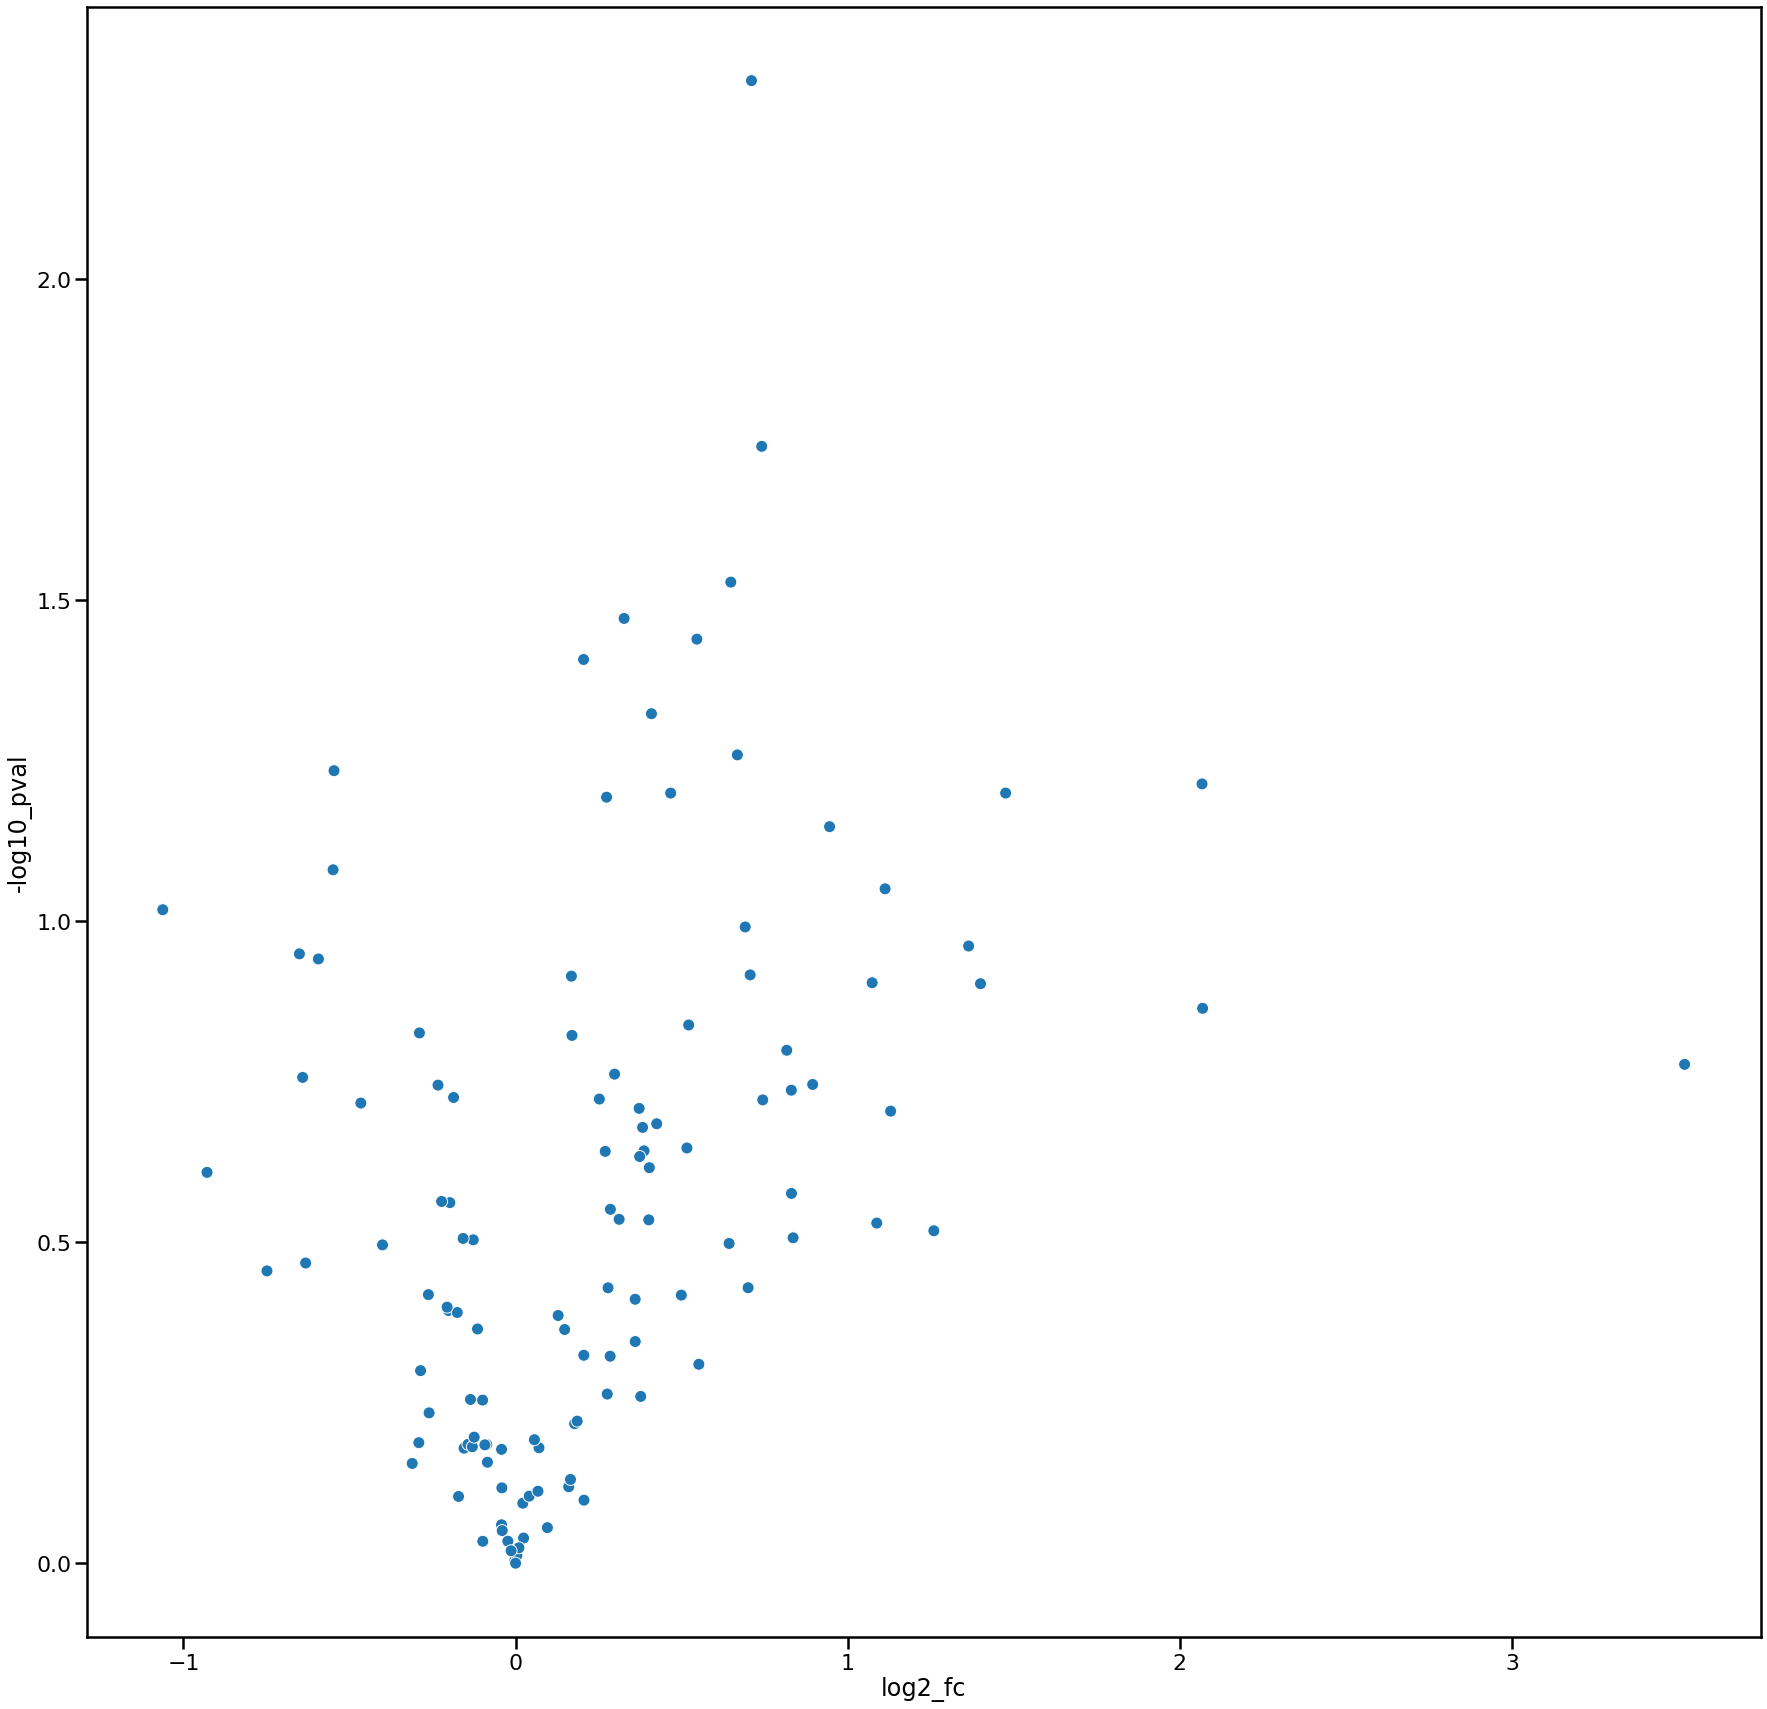

In [24]:
fig_volcano = analyzer.show_volcano_plot(extracted_groups)